# 3.2.5 CYK

Pseudocode for the CKY algorithm <br>
Given a CFG G = (V, Σ, R, S) in Chomsky normal form, w ∈ Σ∗: <br>
Set n = |w|<br>
Intialize an empty n × n table<br>
for i = 1 to n:<br>
....for each variable A in grammar:<br>
.... .... if A → b is a rule and b = wi, add A to cell (i, i)<br>
for l = 2 to n:<br>
.... for i = 1 to n − l + 1:<br>
.... .... j = i + l − 1:<br>
.... .... for k = i to j − 1:<br>
.... .... .... for each rule A → BC:<br>
.... .... .... .... if B ∈ (i, k) and C ∈ (k + 1, j), put A ∈ (i, j)<br>
if S ∈ (1, n), accept string<br>

In [100]:
class CFG():
    """
    A class to define CFGs.
    Parameters:
        variables: a set strings
            The set of distinct variables in the CFG. 
        terminals: a set strings
            The set of distinct terminals in the CFG. 
        rules: dictionary with strings for keys and lists for items
            Dictionary that stores the rules of the grammar. 
        start_var:
            The start variable of the grammar. 
    """
    def __init__(self, variables, terminals, rules, start_var):
        self.variables = variables
        self.terminals = terminals
        self.rules = rules
        self.start_var = start_var

In [101]:
rules = {
     "S": [["T", "T"], ["U", "B"], ["A", "B"], [" "]], # epsilon is represented as " "
     "T": [["T", "T"], ["U", "B"],["A", "B"]],
     "U": [["A", "T"]],
     "A": [["a"]],
     "B": [["b"]]
    }

variables = {"S", "T", "U", "A", "B"}
terminals = {'a', 'b'}


G = CFG(variables, terminals, rules, "S")

In [104]:
def CYK(input_string, CFG):
    """
    A function that represents the CYK algorithm (bottom up approach) parser.
    
    Parameters:
    input_string: string
        The string we would like to check
    CFG: class CFG
        The CFG in Chomsky normal form. 
    """
    
    # Initialize length of string.
    n = len(input_string)
    
    # Initialize empty nxn table.
    # Each cell is a set containing distinct variables.
    table = [[set([]) for i in range(n)] for j in range(n)]
    
    # Update the table. 
    for i in range(n):
        # Add each variable to the table if it meets the conditions.
        for rule in G.rules.items():
            # If the rule only contains a terminal and it matches the symbol of the string.
            for rule_ in rule[1]:
                if len(rule_) == 1 and rule_[0] == input_string[i]:
                    # Update table. 
                    table[i][i].add(rule[0])                            
    
    # Break up the input string
    for l in range(2,n+1):
        for i in range(1, n-l+1+1):
            j = i+l-1
            for k in range(i, j):
                
                # Find the rules of type A->BC.
                for rule in rules.items(): 
                    for rule_ in rule[1]:
                        if len(rule_) >= 2:
                            
                            # Check if B and C are in the respective table cells.
                            if rule_[0] in table[i-1][k-1] and rule_[1] in table[k][j-1]:
                                # If so, update table, add the variable. 
                                table[i-1][j-1].add(rule[0])
    
    # If starting variable in top right-corner, accept. 
    if G.start_var in table[0][n-1]:
        return True
    # Otherwise, reject. 
    else:
        return False


In [105]:
assert CYK(' ', G) == True # empty string
assert CYK('a', G) == False # buidling blcok
assert CYK('b', G) == False # bulding block
assert CYK('ab', G) == True # shortest string
assert CYK('aaaaaabbbbbb', G) == True # longer string a^nb^n
assert CYK('ababaababb', G) == True # longer string with harder format

## Experimental Time Complexity of CYK

In [127]:
import random
import matplotlib.pyplot as plt
import time

    
    
def graph_time(n, algorithm):
    """
    Produce 2 lists for the x and y-axis of an algorithm runtime graph. 
    ---------
    Parameters:
    - n: int
        Maximum length of input string we want to reach.
    - algorithm: function
        The algorithm we want to test.
    Returns:
    - tuple: a tuple of two lists with values for the x-axis (number of activities) and
             y-axis the average runtime after 100 trials it took the algorithm. 
    """
    # Take every 100 points. 
    # At first the step was smaller at 10 to allow for more data points,
    # but they take an incredibly long time to compute so I ahd to icnrease it. 
    x_axis = list(range(1,n,100))
    y_axis = []
    
    
    for i in range(2,n,100):
        temp_time = 0
        # Have 100 trials. 
        for j in range(100):
            start = time.time()
            
            # Create input strings of different sizes.
            random_input = ''.join(random.choices(['a','b'], k=i))
            
            # Call algorithm. 
            algorithm(random_input, G)
            
            end = time.time()
            temp_time += end - start
            
        # Take the average time. 
        y_axis.append(temp_time/100)
        
    return (x_axis, y_axis)

No handles with labels found to put in legend.


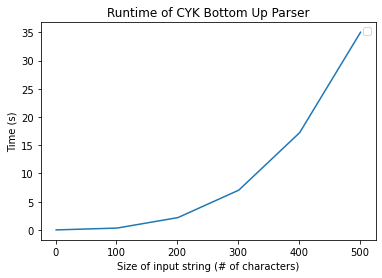

In [128]:
# Store the tuple of the x and y-axis lists.
dynamic_plot_values = graph_time(503, CYK)
# Plot the function and set title, labels, units, and legend.
plt.plot(dynamic_plot_values[0], dynamic_plot_values[1])
plt.title('Runtime of CYK Bottom Up Parser')
plt.xlabel('Size of input string (# of characters)')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

# 2.2 NFA and regular expression

In [635]:
class NFA:
    """ 
    A Non-deterministic Finite Automata class

    Attributes
    ----------
    number_of_states: int
        The total number of states of tha automaton. Used to create the list of states. 
    states: list of int
        The set of states of the automaton. 
    alphabet: list of characters
        The alphabet of the automaton, which indicates the allowed input symbols.
    start_state: int
        The first state the automata goes through when it reads an input.
    accept_states: set of int
        Set of accept states - if the input is at that state in the end then it is accepted.
    transition: dict of sub-dicts
        The set of rules for moving between states. Each symbol is mapped to a set of end states or no end states. 
    """  
    def __init__(self, number_of_states, alphabet, start_state, accept_states, transition):
        """
        Parameters
        ----------
        states: list of strings
            The set of states of the automaton. 
        alphabet: list of characters
            The alphabet of the automaton, which indicates the allowed input symbols.
        start_state: int
            The first state the automata goes through when it reads an input.
        accept_states: list of int
            Set of accept states - if the input is at that state in the end then it is accepted.
        transition: dict of dicts
            The set of rules for moving between states.
        """ 
        self.number_of_states = number_of_states
        self.alphabet = alphabet
        self.start_state = start_state
        self.accept_states = accept_states
        self.transition = transition
        self.states = list(range(0,number_of_states))
    
    
    def validate_input(self, input_string):
        """
        Check if the automaton would accept or reject an input.

        Parameters
        ----------
        input_string: str 
            The string that is inputted in the automaton.

        Returns
        ----------
        Bool
            True if automaton accepts the input string. False if it doesn't.

        """
        
        # Keep track of the current state.
        current_state = {self.start_state}
        # Check if the next_states had an empty string transition.
        set_of_nodes_from_empty_string_transitions = self._check_for_empty_string({self.start_state})

        # If they did, add the corresponding state to the active states. 
        if set_of_nodes_from_empty_string_transitions != None:
            current_state.update(set_of_nodes_from_empty_string_transitions)
            
        # Traverse the input string.
        for char in input_string:
            # Make sure input is valid.
            if char != "ε" and char not in self.alphabet and char != ".":
#                 print(char)
                return "Error. The input string is not valid."
            # Get next state. 
            current_state = self._get_next_state(current_state, char)
#             print("✨✨✨", current_state)
        
        # Check whether the end state contains any of the accept states. 
        
        valid_input = not ( (current_state & self.accept_states) == set())
        return valid_input
    
    def _get_next_state(self, current_state, current_input_symbol):
        # Initialize list of next current state
        next_state = set()
        
        # Traverse all states (nodes) of the current state.
        for node in current_state:
            # Check if the state is in the transition function. 
            if node in self.transition:
#                 print("YES IM IN transition")
                # Go to the sub-dict for transitions for that node.
                # Check if a transition for the current symbol exists.
                # If not, next_states is equal to None. 
                set_of_next_states = self.transition[node].get(current_input_symbol)
#                 print("🧐🧐🧐")
#                 print(self.transition[node].get(current_input_symbol))
#                 print("Node", node)
#                 print("current_input_symbol",current_input_symbol)
                if set_of_next_states != None:

                    next_state.update(set_of_next_states)
                    
                    # Check if the next_states had an empty string transition.
                    set_of_nodes_from_empty_string_transitions = self._check_for_empty_string(next_state)
                    
                    # If they did, add the corresponding state to the active states. 
                    if set_of_nodes_from_empty_string_transitions != None:
                        next_state.update(set_of_nodes_from_empty_string_transitions)
#                 elif node != self.start_state:
#                     # Check if the next_states had an empty string transition.
#                     set_of_nodes_from_empty_string_transitions = self._check_for_empty_string({node})
                    
#                     # If they did, add the corresponding state to the active states. 
#                     if set_of_nodes_from_empty_string_transitions != None:
#                         next_state.update(set_of_nodes_from_empty_string_transitions)
#         print("NEXT STATE", next_state)            
        return next_state
    
    def _check_for_empty_string(self, current_state):
        
        # Traverse current active states. 
        for node in current_state:
            
            # Check if they have an empty string transition.
            if node in self.transition:
#                 print(node)
#                 print(self.transition[node])
                set_of_next_states = self.transition[node].get('ε')
        
        return set_of_next_states
        
                
    
    def get_end_state(self, input_string):
        """
        Output the final state the automaton ends on after reading the string.

        Parameters
        ----------
        input_string: str 
            The string that is inputted in the automaton.

        Returns
        ----------
        Set
            Set of the final state the automaton ends on. 

        """
        
        # Keep track of the current state.
        current_state = {self.start_state}
        
        # Traverse the input string.
        for char in input_string:
            # Make sure input is valid.
            if char != "ε" and char not in self.alphabet:
                return "Error. The input string is not valid."
            # Get next state. 
            current_state = self._get_next_state(current_state, char)
            
        return current_state

In [636]:
transition_function = { 0: {'0':{1}, '1':{1}},
                        1: {'0':{0}, '1':{1}}
                        }
A1 = NFA(2, ['0','1'], 0, {1}, transition_function)

print(A1.validate_input("1"))
print(A1.validate_input("5"))
print(A1.validate_input("0000"))
print(A1.validate_input("0005"))
print(A1.validate_input("0001"))

print("New NFA /n")
# New NFA

transition_function = { 0: {'0':{1}},
                        1: {'1':{2}},
                        2: {'0':{0}, 'ε':{0}}
                        }
                        

A2 = NFA(3, ['0', '1'], 0, {1}, transition_function)
print(A2.validate_input("1"))
print(A2.validate_input("0"))
print(A2.validate_input("010"))

print("New NFA /n")
# New NFA

transition_function = { 0: {'a':{1}},
                        1: {'b':{2}},
                        2: {'a':{0}, 'ε':{0}}
                        }
                        

# Try whether alphabet with different symbols from 0 and 1 works.
A2 = NFA(3, ['a', 'b'], 0, {1}, transition_function)
print(A2.validate_input("b"))
print(A2.validate_input("a"))
print(A2.validate_input("aba"))

True
Error. The input string is not valid.
False
Error. The input string is not valid.
True
New NFA /n
False
True
True
New NFA /n
False
True
True


In [637]:
# The only symbols allowed are the lowercase letters. 
import string
import re

alphabet = string.ascii_lowercase 

def validate_rex_to_NFA(rex_input, string_input):
    # Store all NFAs as we build them. 
    NFA_stack = []
    
    # Create alphabet. 
    sigma = set()
    # Get the smallest building blocks: single characters. 
    for symbol in rex_input:
        
        if symbol in alphabet:
            sigma.add(symbol) 
        if symbol == ".":
            sigma = {'a','b','c','d','e','f','g','h','i','j','k',
                     'l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'}
    
    for char in rex_input:
        # If character is a symbol, create its NFA. 
        if char in sigma or char==".":
#             print("Added new symbol NFA🚀")
            new_NFA = generate_nfa_symbol(char, sigma)
            NFA_stack.append(new_NFA)
            
        # If character is concatenation symbol &, combine the two NFAs. 
        elif char == "&":
            
            NFA_second = NFA_stack.pop()
            NFA_first = NFA_stack.pop()
#             print("Added new & NFA🌱")
            new_NFA = generate_nfa_concatenation(NFA_first, NFA_second)
            NFA_stack.append(new_NFA)
        
        # Union.
        elif char == "∪": 
            NFA_second = NFA_stack.pop()
            NFA_first = NFA_stack.pop()
            new_NFA = generate_nfa_union(NFA_first, NFA_second)
            
            NFA_stack.append(new_NFA)
        # Star    
        elif char == "*": 
            NFA = NFA_stack.pop()
            new_NFA = generate_nfa_star(NFA)
            NFA_stack.append(new_NFA)

    final_NFA = NFA_stack.pop()
#     print(final_NFA.transition)
    return final_NFA.validate_input(string_input)
    

### Let's define the operations in different functions and test them.

In [638]:
# Define all operations
def generate_nfa_symbol(character, sigma):
    """
    Create NFA from a single symbol. These are the smallest building blocks of the language,
    """
    
    if character == ".":
        transition_function = { 0: {"a":{1}, "b":{1}, "c":{1}, "d":{1}, "e":{1}, "f":{1}, "g":{1}, "h":{1},
                                   "i":{1}, "j":{1}, "k":{1}, "l":{1}, "m":{1}, "n":{1}, "o":{1}, "p":{1},
                                    "q":{1}, "e":{1}, "s":{1}, "t":{1}, "u":{1}, "v":{1}, 
                                    "w":{1}, "x":{1}, "y":{1}, "z":{1}
                                   }, 
                               1: {}
                              }

        nfa = NFA(2, sigma, 0, {1}, transition_function)
        return nfa
    else:
        transition_function = { 0: {character: {1}}, 1: {}}
        nfa = NFA(2, sigma, 0, {1}, transition_function)

        return nfa


In [639]:
assert (validate_rex_to_NFA("a", "a") == True)
assert (validate_rex_to_NFA("b", "b") == True)
assert (validate_rex_to_NFA(".", "b") == True)
assert (validate_rex_to_NFA(".", "c") == True)
assert (validate_rex_to_NFA("..&.&", "aaa") == True)
assert (validate_rex_to_NFA(".*", "aaa") == True)
assert (validate_rex_to_NFA("aa&", "aa") == True)

In [640]:
def generate_nfa_concatenation(NFA_first, NFA_second):
    """
    Create NFA by concatenating two other existing NFAs. 
    Remove the final state of NFA_first. Transition from the previous final states
    to the start state of the second NFA.
    """
    # New number of states. 
    number_of_states = copy.deepcopy(NFA_first.number_of_states) + copy.deepcopy(NFA_second.number_of_states)
    
    
    # Alphabet is the same for all NFAs throughout the process.
    alphabet = copy.copy(NFA_second.alphabet)
    
    # Start state
    start_state = NFA_first.start_state
    
    # Accept states same as second NFA.
    accept_states = {x+NFA_first.number_of_states for x in NFA_second.accept_states}
    
    # Create the new transition function by combining the 2 exisiting ones.
    new_transition_function = {}
    new_transition_function.update(copy.deepcopy((NFA_first.transition)))
    
    # Update transition function of NFA2 so we can merge them.
    second_transition_function =  copy.deepcopy(NFA_second.transition)
#     print("SECOND",second_transition_function)
    second_transition_function = update_transitions(second_transition_function, NFA_first.number_of_states)

    
#     print("FIRST",new_transition_function)
    

    # Update transition function by adding the transition function of the second NFA.
    new_transition_function.update(second_transition_function)
    
#     print("COMBINED",new_transition_function)
    
    # Add epsilon transitions from NFA1 final states to NFA2 start state. 
    for state in NFA_first.accept_states:
#         print(state)
#         print(new_transition_function)
        if 'ε' in new_transition_function[state].keys():
#             print("⏳")
            new_transition_function[state]['ε'].add(copy.deepcopy(NFA_second.start_state))
        else:
#             print("🔐")
            new_transition_function[state]['ε'] = {copy.deepcopy(NFA_second.start_state+NFA_first.number_of_states)}

    new_NFA = NFA(number_of_states, copy.deepcopy(NFA_first.alphabet), copy.deepcopy(NFA_first.start_state), 
                  copy.deepcopy(accept_states), new_transition_function)

    return new_NFA


def update_transitions(transition_function, increment_value):
    new_transition_function = {}

    for i in range(len(transition_function)):
        curr_transition = transition_function[i]
        curr_keys = curr_transition.keys()
        new_transition_function[i+increment_value] = {}
#         print("new_transition_function[i+increment_value] = {}", new_transition_function)
        for key in curr_keys:
#             print("key",key)
#             print("curr_transition[key]", curr_transition[key])
            new_set = {x+increment_value for x in curr_transition[key]}
            new_transition_function[i+increment_value].update({key:set()})
            new_transition_function[i+increment_value][key].update(new_set)
#             print("new_transition_function[i+increment_value][key] = new_set", new_transition_function)
    return new_transition_function


In [641]:
assert (validate_rex_to_NFA("ab&", "ab") == True)
assert(validate_rex_to_NFA("ab&c&", "abc") == True)
assert(validate_rex_to_NFA("ab&c&d&", "abcd") == True)
assert(validate_rex_to_NFA("ab&c&d&", "abc") == False)

In [642]:
def generate_nfa_union(NFA_first, NFA_second):
    """
    Create NFA by union of two other existing NFAs. 
    Combine them by making a new start state and epsilon 
    transition to the existing start states.
    """
    # New number of states. 
    number_of_states = copy.deepcopy(NFA_first.number_of_states) + copy.deepcopy(NFA_second.number_of_states) + 1
    
    
    # Alphabet is the same for all NFAs throughout the process.
    alphabet = copy.copy(NFA_second.alphabet)
    
    # Start state
    start_state = 0
    
    # Both NFAs keep the accept states.
    accept_states = {x+1 for x in NFA_first.accept_states}
    NFA2_accept_states = {x+1+NFA_first.number_of_states for x in NFA_second.accept_states}
    accept_states.update(NFA2_accept_states)
    
    # Create the new transition function by combining the 2 exisiting ones.
    new_transition_function = {}
    new_transition_function.update(copy.deepcopy((NFA_first.transition)))
#     print("FIRST",new_transition_function)
    new_transition_function = update_transitions(new_transition_function, 1)
#     print("FIRST",new_transition_function)

    # Update transition function of NFA2 so we can merge them.
    second_transition_function =  copy.deepcopy(NFA_second.transition) 
#     print("SECOND", second_transition_function)
    second_transition_function = update_transitions(second_transition_function, 1+NFA_first.number_of_states)
#     print("SECOND", second_transition_function)
    # Update it by adding the transition function of the second NFA.
    new_transition_function.update(second_transition_function)
#     print("COMBINED", new_transition_function)
    new_transition_function[0] = {}
#     print("COMBINED", new_transition_function)
    
    # Add epsilon transitions from NFA1 final states to NFA2 start state. 
    if 'ε' in new_transition_function[0].keys():
        new_transition_function[0]['ε'].add(copy.deepcopy(NFA_first.start_state)+1)
    else:
#         print("IM HERE")
        new_transition_function[0]['ε'] = {copy.deepcopy(NFA_first.start_state+1)}
        new_transition_function[0]['ε'].add(copy.deepcopy(NFA_second.start_state+1+NFA_first.number_of_states))
    
 
    
    new_NFA = NFA(number_of_states, copy.deepcopy(NFA_first.alphabet), 0, 
                  copy.deepcopy(accept_states), new_transition_function)
#     print(new_transition_function)
#     print(new_NFA.accept_states)
#     print(new_NFA.start_state)
    return new_NFA


In [643]:
assert (validate_rex_to_NFA("ab∪", "a") == True)
assert (validate_rex_to_NFA("ab∪", "b") == True)
assert (validate_rex_to_NFA("ab∪", "aa") == False)
assert (validate_rex_to_NFA("ab∪", "c") == "Error. The input string is not valid.")
assert(validate_rex_to_NFA("ab∪c&", "ac") == True) # The actual expression is a∪bc
assert(validate_rex_to_NFA("ab∪c&", "bc") == True) # The actual expression is a∪bc
assert(validate_rex_to_NFA("ab∪c&", "a") == False) # The actual expression is a∪bc
assert(validate_rex_to_NFA("ab∪c&", "abc") == False) # The actual expression is a∪bc

In [644]:
def generate_nfa_star(NFA_first):
    """
    Create NFA star. Here the star operator can only be applied to a single character. 
    This means that the NFA of a single symbol will have a self loop on the final state. 
    """
    # New number of states. 
    number_of_states = copy.deepcopy(NFA_first.number_of_states)
    
    
    # Alphabet is the same for all NFAs throughout the process.
    alphabet = copy.deepcopy(NFA_first.alphabet)
    
    # Start state
    start_state = copy.deepcopy(NFA_first.start_state)
    
    # Both NFAs keep the accept states.
    accept_states = copy.deepcopy(NFA_first.accept_states)
    
    # Create the new transition function.
    new_transition_function = {}
    new_transition_function.update(copy.deepcopy((NFA_first.transition)))

#     character = list(new_transition_function[start_state].keys())[0]
#     new_transition_function[1][character] = {1}

    # Update it.
    for char in list(new_transition_function[start_state].keys()):
        new_transition_function[1][char] = {1}

 
    
    new_NFA = NFA(number_of_states, alphabet, start_state, 
                  accept_states, new_transition_function)
    
#     print(new_transition_function)
#     print(new_NFA.accept_states)
#     print(new_NFA.start_state)
    return new_NFA

In [645]:
assert(validate_rex_to_NFA("a*", "a") == True)
assert(validate_rex_to_NFA("a*", "aa")==True)
assert(validate_rex_to_NFA("a*", "aaaaaa") == True)
assert(validate_rex_to_NFA("a*", "aab") == "Error. The input string is not valid.")
assert (validate_rex_to_NFA("a*b&", "aab") == True)
assert(validate_rex_to_NFA("a*b&", "aaaaaaab") == True)
assert(validate_rex_to_NFA("a*b&", "aa")==False)
assert(validate_rex_to_NFA("a*b∪c&", "aac")==True)
assert(validate_rex_to_NFA("a*b∪c&", "aaabc")==False)
assert(validate_rex_to_NFA("a*b∪c&", "bc")==True)
assert(validate_rex_to_NFA("a*b∪c&", "bbc")==False)
assert(validate_rex_to_NFA("a*b∪c&", "aa")==False)
assert(validate_rex_to_NFA(".*", "caab")==True)
assert(validate_rex_to_NFA(".*", "dsahkjdasjdasdsa")==True)
assert(validate_rex_to_NFA(".*a&", "dsahkjdasjdasdsa")==True)

## 2.2.2

In [728]:
def validate_string_from_rex(rex, input_string):
        """Implementation of recursive algorithm to validate string from rex"""
        
        # For the base case when they are empty. 
        if not rex:
            return not input_string

        # If the input string is at least of length 1 and the first rule matches 
        # with the first character of the inout, then store that as True. 
        # Otherwise false (no validated substring). 
        is_substring_validated = bool(input_string) and rex[0] in {input_string[0], '.'}
        
        # If the next character of the Reg Expr has the star operation.
        if len(rex) > 1 and rex[1] == '*':
            # Call function recursively.
            # If the rest of the input_string matches, AND either we matched 
            # the left side already or we match the string with another part 
            # of the expression, validate the string. 
            output = (validate_string_from_rex(rex[2:],input_string) or
                    is_substring_validated and 
                    validate_string_from_rex(rex, input_string[1:]))
                    
            return output
        
        # If the next character of the Reg Expr has the union operation.
        elif len(rex) > 1 and rex[1] == '∪':
            # If we match the string with whatever is on the right side of the union
            # or we march it with the left side, accept the string.
            output = (validate_string_from_rex(rex[2:],input_string) or 
                      validate_string_from_rex(rex[0:1], input_string[0:1]) and 
                      is_substring_validated)
            return output
        # If no special characters, then perform concatenation.
        else:
            # Check if each of the symbols in the input string match the pattern. 
            output = (is_substring_validated and 
                        validate_string_from_rex(rex[1:],input_string[1:]))
            return output

In [729]:
assert (validate_string_from_rex("a*", "aaaaaaaaa") == True)
assert (validate_string_from_rex( ".", "g") ==True)
assert (validate_string_from_rex( "....", "gggg") ==True)
assert (validate_string_from_rex( "....", "abcd") ==True)
assert (validate_string_from_rex( "a*", "") == True)
assert (validate_string_from_rex( "a*", "aa") == True)
assert (validate_string_from_rex( ".*", "aca") ==True)
assert (validate_string_from_rex("a*b", "aaaaaaaaab") == True)
assert (validate_string_from_rex("a*b*c", "aaaaaaaaabc") == True)
assert (validate_string_from_rex("a*b*c", "aaaaaaaaab") == False)
assert (validate_string_from_rex("aabc", "aabc") == True)

In [730]:
assert (validate_string_from_rex("a∪b", "a") == True)
assert (validate_string_from_rex("ab∪c", "ab") == True)
assert (validate_string_from_rex("ab∪c", "ac") == True)
assert (validate_string_from_rex("a∪cd", "a") == True)
assert (validate_string_from_rex("a∪cd", "cd") == True)

In [738]:
import random
import matplotlib.pyplot as plt
import time

    
    
def graph_time(n, algorithm):
    """
    Produce 2 lists for the x and y-axis of an algorithm runtime graph. 
    ---------
    Parameters:
    - n: int
        Maximum length of input string we want to reach.
    - algorithm: function
        The algorithm we want to test.
    Returns:
    - tuple: a tuple of two lists with values for the x-axis (number of activities) and
             y-axis the average runtime after 100 trials it took the algorithm. 
    """
    # Take every 100 points. 
    # At first the step was smaller at 10 to allow for more data points,
    # but they take an incredibly long time to compute so I ahd to icnrease it. 
    x_axis = list(range(0,n,10))
    y_axis = []
    
    
    for i in range(0,n,10):
        temp_time = 0
        # Have 100 trials. 
        for j in range(100):
            start = time.time()
            
            # Create input strings of different sizes.
            random_input = ''.join(random.choices(['a','b','c','d'], k=i))
            random_rex = ''.join(random.choices(['a','b','c','d','.','*','∪'], k=i))
            rex = "a*"
            # Call algorithm. 
            algorithm(rex, random_input)
            
            end = time.time()
            temp_time += end - start
            
        # Take the average time. 
        y_axis.append(temp_time/100)
        
    return (x_axis, y_axis)

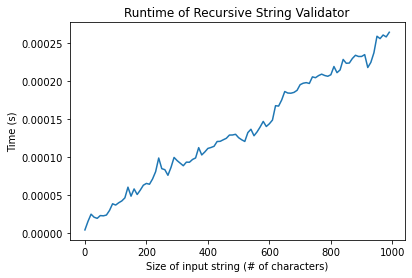

In [748]:
# Store the tuple of the x and y-axis lists.
dynamic_plot_values = graph_time(1000, validate_string_from_rex)
# Plot the function and set title, labels, units, and legend.
plt.plot(dynamic_plot_values[0], dynamic_plot_values[1])
plt.title('Runtime of Recursive String Validator')
plt.xlabel('Size of input string (# of characters)')
plt.ylabel('Time (s)')
plt.show()

In [742]:
import random
import matplotlib.pyplot as plt
import time

    
    
def graph_time(n, algorithm):
    """
    Produce 2 lists for the x and y-axis of an algorithm runtime graph. 
    ---------
    Parameters:
    - n: int
        Maximum length of input string we want to reach.
    - algorithm: function
        The algorithm we want to test.
    Returns:
    - tuple: a tuple of two lists with values for the x-axis (number of activities) and
             y-axis the average runtime after 100 trials it took the algorithm. 
    """
    # Take every 100 points. 
    # At first the step was smaller at 10 to allow for more data points,
    # but they take an incredibly long time to compute so I ahd to icnrease it. 
    x_axis = list(range(0,n,10))
    y_axis = []
    
    
    for i in range(0,n,10):
        temp_time = 0
        # Have 100 trials. 
        for j in range(100):
            start = time.time()
            
            # Create input strings of different sizes.
            random_input = ''.join(random.choices(['a','b','c','d'], k=i))
            random_rex = ''.join(random.choices(['a','b','c','d','.','*','∪'], k=i))
            rex = "a*"
            str_input = "aaaaa"
            # Call algorithm. 
            algorithm(random_rex, str_input)
            
            end = time.time()
            temp_time += end - start
            
        # Take the average time. 
        y_axis.append(temp_time/100)
        
    return (x_axis, y_axis)

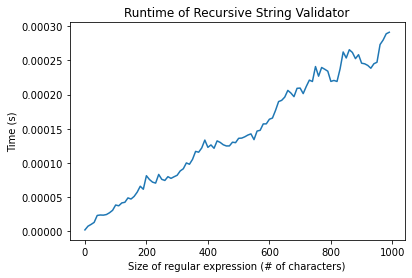

In [749]:
# Store the tuple of the x and y-axis lists.
dynamic_plot_values = graph_time(1000, validate_string_from_rex)
# Plot the function and set title, labels, units, and legend.
plt.plot(dynamic_plot_values[0], dynamic_plot_values[1])
plt.title('Runtime of Recursive String Validator')
plt.xlabel('Size of regular expression (# of characters)')
plt.ylabel('Time (s)')
plt.show()